<a href="https://colab.research.google.com/github/Sadiqueejaz316/RISC-V-Edge-AI-Workshop/blob/main/firstAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

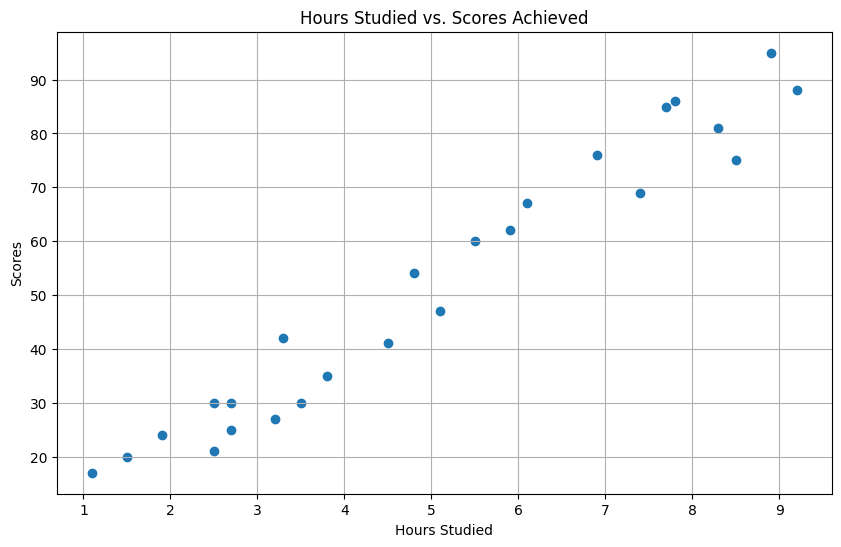

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/studentscores-1fef94ba-27e1-4fab-a7ad-56867b8fb5a1.csv')

# Plot Hours vs Scores
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours Studied vs. Scores Achieved')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [ ]:
print(x)

NameError: name 'x' is not defined

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values # Correctly extract all 'Scores' values

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (25, 1)
Shape of Y: (25,)


I've now created `X` containing the 'Hours' data and `y` containing the 'Scores' data. I've also reshaped `X` to be a 2D array, which is often required for machine learning models. y=mx+c


In [ ]:
class Model():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self, X):
        return X.dot(self.slope) + self.const

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.slope = np.zeros(self.n)
        self.const = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dw = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m

        self.slope = self.slope - self.learning_rate * dw
        self.const = self.const - self.learning_rate * db
        return self

In [ ]:
model = Model(learning_rate=0.01, iterations=1000)
model.fit(X,Y)

In [ ]:
Y_pred = model.predict(X)
print(Y_pred)

[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


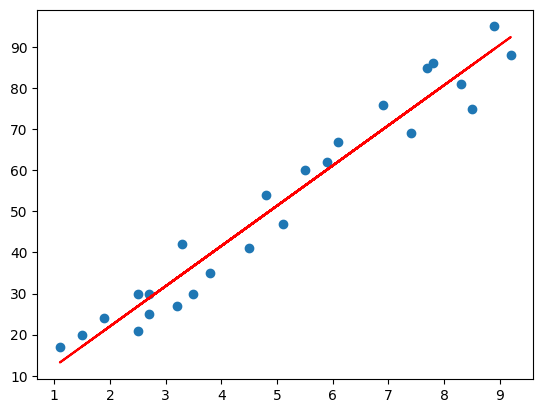

In [ ]:
plt.scatter(df['Hours'], df['Scores'])
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
print(model.slope, model.const)

[9.77890599] 2.4644522714760995


In [ ]:
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m']= np.random.uniform(0, 1) * -1
        self.parameters['c']= np.random.uniform(0,1)* -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) +1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 3386.7530976098806
Iteration = 1, Loss = 1396.8706287595023
Iteration = 1, Loss = 1137.1732683647017
Iteration = 1, Loss = 1100.483257014208
Iteration = 2, Loss = 1092.5585193422799
Iteration = 3, Loss = 1088.3653596435472
Iteration = 4, Loss = 1084.67730226633
Iteration = 5, Loss = 1081.0783414424475
Iteration = 6, Loss = 1077.5146802329864
Iteration = 7, Loss = 1073.9792038032958
Iteration = 8, Loss = 1070.47081499438
Iteration = 9, Loss = 1066.9891935666599
Iteration = 10, Loss = 1063.5341207718986
Iteration = 11, Loss = 1060.105392295062
Iteration = 12, Loss = 1056.7028070241306
Iteration = 13, Loss = 1053.3261655925364
Iteration = 14, Loss = 1049.9752701811572
Iteration = 15, Loss = 1046.6499244827103
Iteration = 16, Loss = 1043.349933687161
Iteration = 17, Loss = 1040.075104469908
Iteration = 18, Loss = 1036.8252449804086
Iteration = 19, Loss = 1033.600164830932
Iteration = 20, Loss = 1030.399675085404
Iteration = 21, Loss = 1027.2235882483396
Iteration = 22

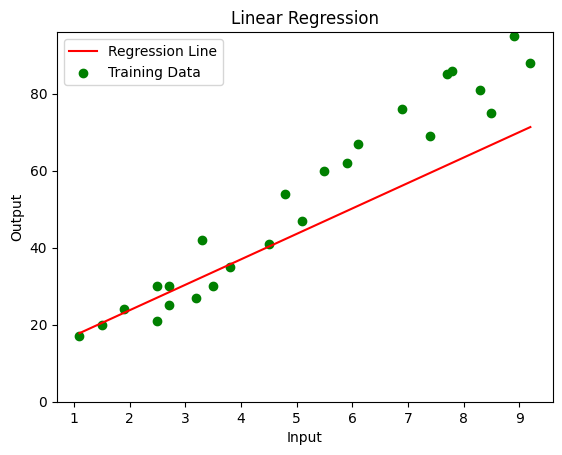

In [ ]:
model = LinearRegression()
parameters, loss = model.train(X, Y, learning_rate=0.01, iters=50)

In [ ]:
df_startups = pd.read_csv('/content/50_startups.csv')
X = df_startups.iloc[:,:-1].values
Y = df_startups.iloc[:, -1].values
print(df_startups.head())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print(Y_pred)
for i, (pred, actual) in enumerate(zip(Y_pred, Y_test)):
    print(f"Sample {i+1}: Predicted Profit = {pred:.2f}, Actual Profit = {actual:.2f}")

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Sample 1: Predicted Profit = 16.88, Actual Profit = 20.00
Sample 2: Predicted Profit = 33.73, Actual Profit = 27.00
Sample 3: Predicted Profit = 75.36, Actual Profit = 69.00
Sample 4: Predicted Profit = 26.79, Actual Profit = 30.00
Sample 5: Predicted Profit = 60.49, Actual Profit = 62.00


In [ ]:
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [9.91065648]
Intercept: 2.018160041434662
